In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# . Найти в интернете многомерную выборку, т.е. результаты наблюдений за большим
(не менее 100) числом объектов, для каждого из которых известно несколько
количественных признаков. Наблюдаемые объекты должны быть разбиты на несколько
(3 или более) классов, и для каждого объекта должно быть известно, к какому
классу он относится.

In [2]:
file = ('diamonds.csv')
data = pd.read_csv(file, encoding='latin-1')

In [3]:
data.dropna(inplace = True)

In [4]:
df = data.sample(200)

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.83785,61.78700,57.561500,4320.830000,5.828000,5.829950,3.585800
std,0.48962,1.33169,2.180099,4211.491428,1.134669,1.127041,0.713839
min,0.23000,57.00000,53.000000,381.000000,3.890000,3.860000,1.410000
25%,0.40750,61.17500,56.000000,1019.000000,4.765000,4.777500,2.930000
50%,0.71000,61.90000,57.000000,2693.500000,5.725000,5.740000,3.530000
75%,1.07250,62.42500,59.000000,6053.750000,6.577500,6.602500,4.055000
max,2.50000,66.50000,65.000000,18691.000000,8.460000,8.450000,5.480000


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

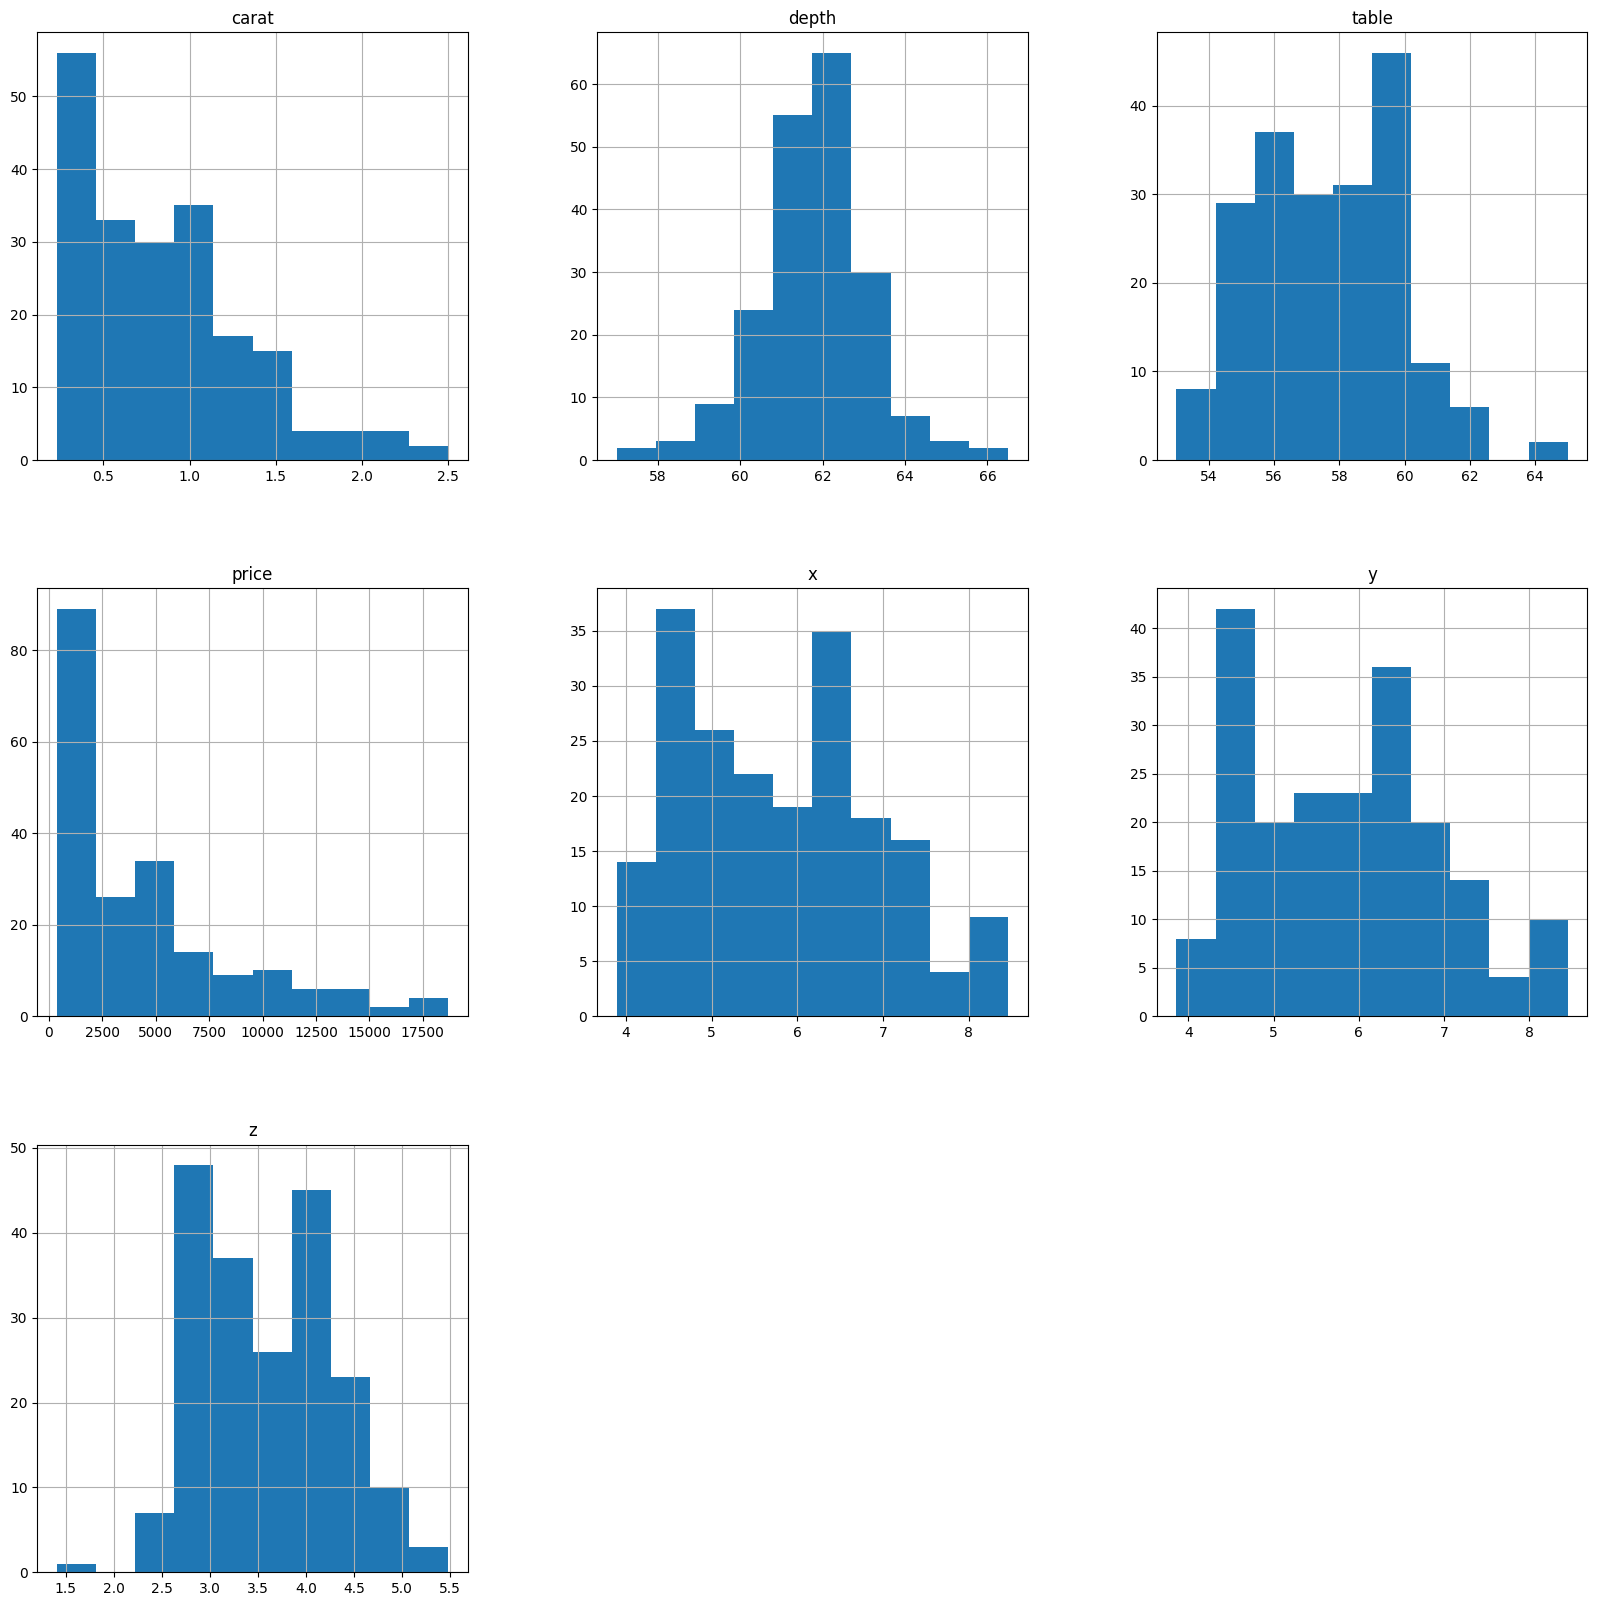

In [6]:
df.hist(figsize=(20, 20))


In [7]:
def category(price):
    if price < 2500:
        return 'normal'
    elif (price >= 2500) & (price <= 5500):
        return 'expensive'
    else:
        return 'very expensive'

In [8]:
df['price_category'] = df['price'].apply(category)

In [11]:
df.drop('price', axis = 1, inplace=True)

In [12]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price_category
48778,0.70,Premium,H,SI1,62.2,59.0,5.70,5.65,3.53,normal
51605,0.70,Premium,I,VS1,62.4,59.0,5.64,5.55,3.49,normal
9623,0.90,Premium,G,VS2,61.7,57.0,6.21,6.11,3.80,expensive
27711,0.36,Premium,I,VS2,62.7,59.0,4.58,4.54,2.86,normal
19174,1.43,Fair,E,SI1,65.1,56.0,7.10,7.03,4.61,very expensive
...,...,...,...,...,...,...,...,...,...,...
27673,1.50,Very Good,G,VS2,60.7,59.0,7.31,7.38,4.46,very expensive
46154,0.50,Ideal,G,VS1,62.3,55.0,5.11,5.07,3.17,normal
22505,1.58,Ideal,H,SI1,61.4,56.0,7.46,7.53,4.60,very expensive
39448,0.50,Good,E,SI2,63.3,56.0,5.05,5.09,3.21,normal


In [13]:
df['price_category'].value_counts()

normal            96
expensive         52
very expensive    52
Name: price_category, dtype: int64

# С помощью метода 𝑘 средних разбить массив наблюдений на кластеры. Сравнить
получившиеся кластеры с реально наблюдаемыми классами.

In [14]:
pd.concat([df[df["x"] == 0], df[df["y"] == 0], df[df["z"] == 0]]).drop_duplicates()


,carat,cut,color,clarity,depth,table,x,y,z,price_category


In [15]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]


In [16]:
df[df["z"] == 0]


,carat,cut,color,clarity,depth,table,x,y,z,price_category


In [17]:
df["volume"] = df["x"] * df["y"] * df["z"]


In [18]:
df["density"] = df["carat"]*0.2/df["volume"]


In [19]:
obj_list = [ 
            "cut",
           "color",
            "clarity",
            "price_category"
           
            
    
           ]

In [20]:
import numpy
from sklearn.preprocessing import LabelEncoder

for k in obj_list:
    lb_make = LabelEncoder()
    lb_make.fit(df[k])
    df[f"{k}"] = lb_make.fit_transform(df[f"{k}"])

In [22]:
# defining the kmeans function with initialization as k-means++
from sklearn.cluster import KMeans
kmeans_split = KMeans(n_clusters=3)

In [23]:
X_train = df.drop('price_category', axis = 1)

In [24]:
kmeans_split.fit(X_train)

KMeans(n_clusters=3)

In [25]:
y_pred_list = kmeans_split.predict(X_train)

In [26]:
y_pred_list

array([1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2,
       1, 0])

In [27]:
pd.DataFrame(y_pred_list)

,0
0,1
1,1
2,0
3,1
4,2
...,...
195,2
196,1
197,2
198,1


In [28]:
df.reset_index(inplace=True)

In [29]:
df.drop('index', axis = 1, inplace=True)

In [30]:
df['kmeans_cluster'] = pd.DataFrame(y_pred_list)

In [31]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price_category,volume,density,kmeans_cluster
0,0.70,3,4,2,62.2,59.0,5.70,5.65,3.53,1,113.683650,0.001231,1
1,0.70,3,5,4,62.4,59.0,5.64,5.55,3.49,1,109.243980,0.001282,1
2,0.90,3,3,5,61.7,57.0,6.21,6.11,3.80,0,144.183780,0.001248,0
3,0.36,3,5,5,62.7,59.0,4.58,4.54,2.86,1,59.468552,0.001211,1
4,1.43,0,1,2,65.1,56.0,7.10,7.03,4.61,2,230.098930,0.001243,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.50,4,3,5,60.7,59.0,7.31,7.38,4.46,2,240.607188,0.001247,2
196,0.50,2,3,4,62.3,55.0,5.11,5.07,3.17,1,82.127409,0.001218,1
197,1.58,2,4,2,61.4,56.0,7.46,7.53,4.60,2,258.399480,0.001223,2
198,0.50,1,1,3,63.3,56.0,5.05,5.09,3.21,1,82.511445,0.001212,1


In [32]:
df['density'].shape

(200,)

In [33]:
df['carat'].shape

(200,)

<AxesSubplot:xlabel='density', ylabel='carat'>

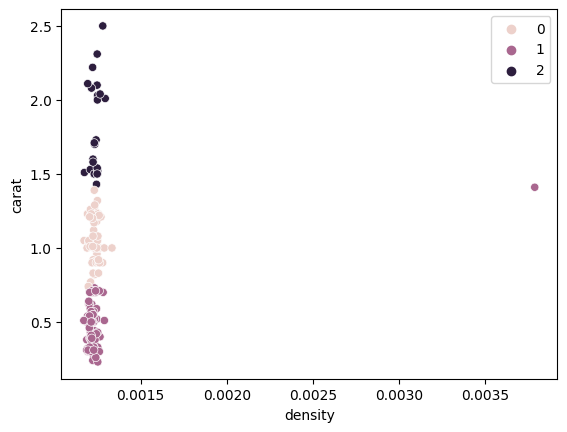

In [34]:
sns.scatterplot(x = df['density'], y = df['carat'], hue=kmeans_split.labels_)


In [35]:
from sklearn.metrics import accuracy_score

In [37]:
print("Accuracy:" , accuracy_score(df['price_category'],df['kmeans_cluster']))

Accuracy: 0.805


# Случайным образом разбить выборку на обучающую и контрольную. По обучающей
выборке построить классификатор с помощью метода 𝑘 ближайших соседей и
наивный байесовский классификатор. Сравнить результаты их работы (процент
правильных классификаций) на контрольной выборке.

# KNN

In [40]:
df.drop('kmeans_cluster', axis = 1, inplace=True)

In [41]:
from sklearn.neighbors import KNeighborsClassifier


In [43]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price_category,volume,density
0,0.70,3,4,2,62.2,59.0,5.70,5.65,3.53,1,113.683650,0.001231
1,0.70,3,5,4,62.4,59.0,5.64,5.55,3.49,1,109.243980,0.001282
2,0.90,3,3,5,61.7,57.0,6.21,6.11,3.80,0,144.183780,0.001248
3,0.36,3,5,5,62.7,59.0,4.58,4.54,2.86,1,59.468552,0.001211
4,1.43,0,1,2,65.1,56.0,7.10,7.03,4.61,2,230.098930,0.001243
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.50,4,3,5,60.7,59.0,7.31,7.38,4.46,2,240.607188,0.001247
196,0.50,2,3,4,62.3,55.0,5.11,5.07,3.17,1,82.127409,0.001218
197,1.58,2,4,2,61.4,56.0,7.46,7.53,4.60,2,258.399480,0.001223
198,0.50,1,1,3,63.3,56.0,5.05,5.09,3.21,1,82.511445,0.001212


In [44]:
x = df.drop(columns = ['price_category'])

In [45]:
y = df['price_category'].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [50]:
preds = knn.predict(X_test)

In [52]:
print("Accuracy of KNN: ", knn.score(X_test, y_test))


Accuracy of KNN:  0.9


# Bayes